<a href="https://colab.research.google.com/github/ksamcaN8/PGS_AdmixAncestry/blob/main/take_2mix5050_CUE%26YRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from numpy.ma.core import zeros
from scipy.stats.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import normaltest
from statistics import mean
from operator import index

<ipython-input-1-21127072da74>:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
my_scores=pd.read_csv("/content/mix_YRIandCUE_noconections_Asthma_mixed_PGS002727.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Asthma-mixed_SUM','Asthma-mixed_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_Asthma_European_PGS002754.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Asthma-European_SUM','Asthma-European_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_BMI_PGS002840.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'BMI_SUM','BMI_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_CoronaryArteryDisease_PGS002778.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'CAD_SUM','CAD_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_Diabetes_PGS003089.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Diabetes_SUM','Diabetes_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_Heartdisease_PGS001780.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Heartdisease_SUM','Heartdisease_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_Hypertension_PGS002994.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Hypertension_SUM','Hypertension_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_Obesity_PGS002033.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Obesity_SUM','Obesity_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_mix_BMI_PGS002313.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'mix-BMI_SUM','mix-BMI_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_mix_Diabetes_PGS002720.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'mix-Diabetes_SUM','mix-Diabetes_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_mix_Hypertension_PGS002701.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'mix-Hypertension_SUM','mix-Hypertension_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/mix_YRIandCUE_noconections_schizophrenia.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Schizophrenia_SUM','Schizophrenia_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
admix=pd.read_csv("/content/trimmed_YRIandCUEand_take2_mix_YRIandCUE.2.Q",sep='\s',names=['YRI','CUE']) # ,names=['YRI','CUE']) # ?? - what is the right order??
admix=pd.concat([pd.read_csv("/content/samples_YRIandCUEand_take2_mix_YRIandCUE.txt",names=['IID']),admix], axis="columns")
my_scores=pd.merge(my_scores,admix,on='IID',how='inner')
for c in my_scores.columns:
  if c !='IID':
    my_scores=my_scores.astype({c:float})
my_scores['chosen_Asthma_mixed']=np.zeros(len(my_scores.index))
my_scores['chosen_Asthma_European']=np.zeros(len(my_scores.index))
my_scores['chosen_BMI']=np.zeros(len(my_scores.index))
my_scores['chosen_CAD']=np.zeros(len(my_scores.index))
my_scores['chosen_Diabetes']=np.zeros(len(my_scores.index))
my_scores['chosen_Heartdisease']=np.zeros(len(my_scores.index))
my_scores['chosen_Hypertension']=np.zeros(len(my_scores.index))
my_scores['chosen_mix_BMI']=np.zeros(len(my_scores.index))
my_scores['chosen_mix_Diabetes']=np.zeros(len(my_scores.index))
my_scores['chosen_mix_Hypertension']=np.zeros(len(my_scores.index))
my_scores['chosen_Obesity']=np.zeros(len(my_scores.index))
my_scores['chosen_Scizophrenia']=np.zeros(len(my_scores.index))
my_scores['chosen_CUE']=np.zeros(len(my_scores.index))
my_scores['Generation']=np.zeros(len(my_scores.index))
my_scores['Family']=np.zeros(len(my_scores.index))

for j in range(0,len(my_scores.index)//10):
  my_scores['chosen_Asthma_European'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Asthma-European_SUM'])]=1
  my_scores['chosen_Asthma_mixed'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Asthma-mixed_SUM'])]=1
  my_scores['chosen_BMI'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['BMI_SUM'])]=1
  my_scores['chosen_CAD'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['CAD_SUM'])]=1
  my_scores['chosen_Diabetes'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Diabetes_SUM'])]=1
  my_scores['chosen_Heartdisease'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Heartdisease_SUM'])]=1
  my_scores['chosen_Hypertension'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Hypertension_SUM'])]=1
  my_scores['chosen_mix_BMI'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['mix-BMI_SUM'])]=1
  my_scores['chosen_mix_Diabetes'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['mix-Diabetes_SUM'])]=1
  my_scores['chosen_mix_Hypertension'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['mix-Hypertension_SUM'])]=1
  my_scores['chosen_Obesity'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Obesity_SUM'])]=1
  my_scores['chosen_Scizophrenia'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Schizophrenia_SUM'])]=1
  my_scores['chosen_CUE'][j*10+6+np.argmax(my_scores[j*10+6:j*10+10]['CUE'])]=1
  my_scores['Generation'][j*10:j*10+4]=1
  my_scores['Generation'][j*10+4:j*10+6]=2
  my_scores['Generation'][j*10+6:j*10+10]=3
  my_scores['Family'][j*10:j*10+10]=j

my_scores['CUE']=round(my_scores['CUE']*100,4)
parent_CUE_means=my_scores.groupby(['Family','Generation']).mean().query('Generation==2')['CUE']

In [ ]:
my_scores.query('Generation==3')['CUE']

In [ ]:
my_scores.query('Generation==1')['CUE']
#parent_CUE_means

In [ ]:
print(my_scores.shape)
my_scores=my_scores.loc[(my_scores['Family']!=9)&(my_scores['Family']!=29)&
 (my_scores['Family']!=55)&(my_scores['Family']!=58)&(my_scores['Family']!=81)&
  (my_scores['Family']!=86)&(my_scores['Family']!=87)]
parent_CUE_means=my_scores.groupby(['Family','Generation']).mean().query('Generation==2')['CUE']
print(my_scores.shape)

In [ ]:
parent_CUE_means   # בשאלה אם זה בסדר להשאיר את אלה שפחות או יותר רק אפריקאיים או רק אירופאיים??
parent_CUE_means.loc[[9,29,55,58,81,86,87],]
# familys: 9,30,56,59,80,86,87
#my_scores

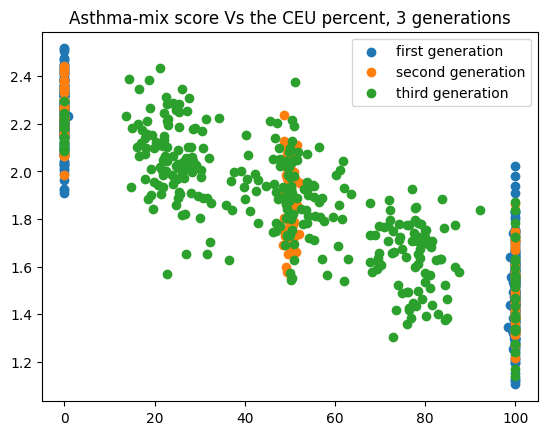

In [ ]:
plt.title('Asthma-mix score Vs the CEU percent, 3 generations')
plt.scatter(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Asthma-mixed_SUM'],label='first generation')  # **
plt.scatter(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Asthma-mixed_SUM'],label='second generation')  # **
plt.scatter(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Asthma-mixed_SUM'],label='third generation')  # **
plt.legend()

(array([232.,   0.,   3.,  22.,  36.,  34.,  13.,   7.,  10.,  82.,  81.,
         13.,  10.,  10.,  18.,  31.,  20.,   3.,   1., 254.]),
 array([1.00000e-03, 5.00090e+00, 1.00008e+01, 1.50007e+01, 2.00006e+01,
        2.50005e+01, 3.00004e+01, 3.50003e+01, 4.00002e+01, 4.50001e+01,
        5.00000e+01, 5.49999e+01, 5.99998e+01, 6.49997e+01, 6.99996e+01,
        7.49995e+01, 7.99994e+01, 8.49993e+01, 8.99992e+01, 9.49991e+01,
        9.99990e+01]),
 <BarContainer object of 20 artists>)

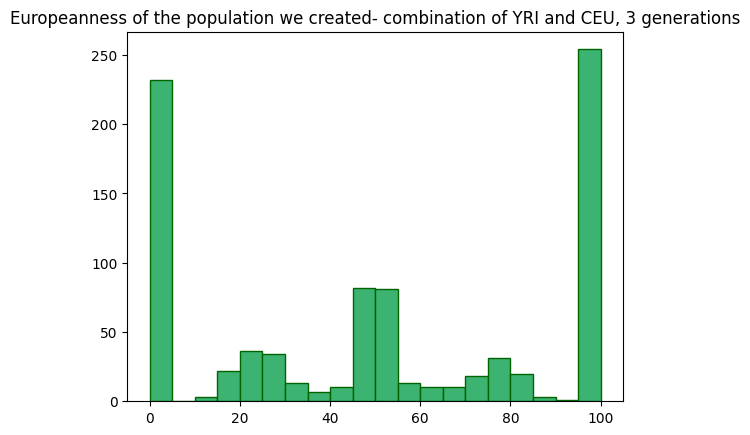

In [ ]:
plt.title('Europeanness of the population we created- combination of YRI and CEU, 3 generations')
plt.hist(my_scores['CUE'],ec='darkgreen',color='mediumseagreen',bins=20)

In [ ]:
print("Correlation Tests, Mix5050_CUE&YRI:")
#print('Asthma-mixed first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Asthma-mixed_SUM']))
#print('Asthma-mixed second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Asthma-mixed_SUM']))
print('Asthma-mixed third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Asthma-mixed_SUM']))
print()
#print('Scizophrenia first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Schizophrenia_SUM']))
#print('Scizophrenia second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Schizophrenia_SUM']))
print('Scizophrenia third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Schizophrenia_SUM']))
print()
#print('Obesity first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Obesity_SUM']))
#print('Obesity second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Obesity_SUM']))
print('Obesity third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Obesity_SUM']))
print()
#print('Diabetes first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Diabetes_SUM']))
#print('Diabetes second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Diabetes_SUM']))
print('Diabetes third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Diabetes_SUM']))
print()
#print('mix-Diabetes first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['mix-Diabetes_SUM']))
#print('mix-Diabetes second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['mix-Diabetes_SUM']))
print('mix-Diabetes third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-Diabetes_SUM']))
print()
#print('mix-Hypertension first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['mix-Hypertension_SUM']))
#print('mix-Hypertension second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['mix-Hypertension_SUM']))
print('mix-Hypertension third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-Hypertension_SUM']))
print()
#print('mix-BMI first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['mix-BMI_SUM']))
#print('mix-BMI second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['mix-BMI_SUM']))
print('mix-BMI third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-BMI_SUM']))
print()
#print('BMI first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['BMI_SUM']))
#print('BMI second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['BMI_SUM']))
print('BMI third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['BMI_SUM']))
print()
#print('Hypertension first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Hypertension_SUM']))
#print('Hypertension second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Hypertension_SUM']))
print('Hypertension third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Hypertension_SUM']))
print()
#print('Asthma-European first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Asthma-European_SUM']))
#print('Asthma-European second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Asthma-European_SUM']))
print('Asthma-European third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Asthma-European_SUM']))
print()
#print('Heartdisease first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Heartdisease_SUM']))
#print('Heartdisease second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Heartdisease_SUM']))
print('Heartdisease third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Heartdisease_SUM']))
print()
#print('CAD first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['CAD_SUM']))
#print('CAD second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['CAD_SUM']))
print('CAD third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['CAD_SUM']))

Correlation Tests, Mix5050_CUE&YRI:
Asthma-mixed third generation PearsonRResult(statistic=-0.7966461760688539, pvalue=1.5948894594583747e-78)

Scizophrenia third generation PearsonRResult(statistic=-0.8218064258217743, pvalue=1.6152220131279256e-87)

Obesity third generation PearsonRResult(statistic=-0.42091134574388167, pvalue=1.511674589418033e-16)

Diabetes third generation PearsonRResult(statistic=-0.31252104238743017, pvalue=2.0557720552264936e-09)

mix-Diabetes third generation PearsonRResult(statistic=-0.2543295066348682, pvalue=1.335507703199899e-06)

mix-Hypertension third generation PearsonRResult(statistic=-0.2852682885654768, pvalue=5.132499142768583e-08)

mix-BMI third generation PearsonRResult(statistic=-0.07743143851448941, pvalue=0.14712752335002705)

BMI third generation PearsonRResult(statistic=-0.07016155863636911, pvalue=0.1890871824413361)

Hypertension third generation PearsonRResult(statistic=-0.11427914146655532, pvalue=0.032075603086182965)

Asthma-European th

In [ ]:
print('Asthma multi-ancestry', ttest_1samp(my_scores.query('chosen_Asthma_mixed==1')['CUE']-np.array(parent_CUE_means),0)[1])
print('Scizophrenia', ttest_1samp(my_scores.query('chosen_Scizophrenia==1')['CUE']-np.array(parent_CUE_means),0)[1])
print('Obesity', round(ttest_1samp(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('Diabetes', round(ttest_1samp(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('Diabetes multi-ancestry', round(ttest_1samp(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('Hypertension multi-ancestry', round(ttest_1samp(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('BMI multi-ancestry', round(ttest_1samp(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('BMI', round(ttest_1samp(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('Hypertension', round(ttest_1samp(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('Asthma', round(ttest_1samp(my_scores.query('chosen_Asthma_European==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('Heartdisease ', round(ttest_1samp(my_scores.query('chosen_Heartdisease ==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('CAD ', round(ttest_1samp(my_scores.query('chosen_CAD ==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('CUE', ttest_1samp(my_scores.query('chosen_CUE==1')['CUE']-np.array(parent_CUE_means),0)[1])

Text(-10, 10, 'P= 9e-17')

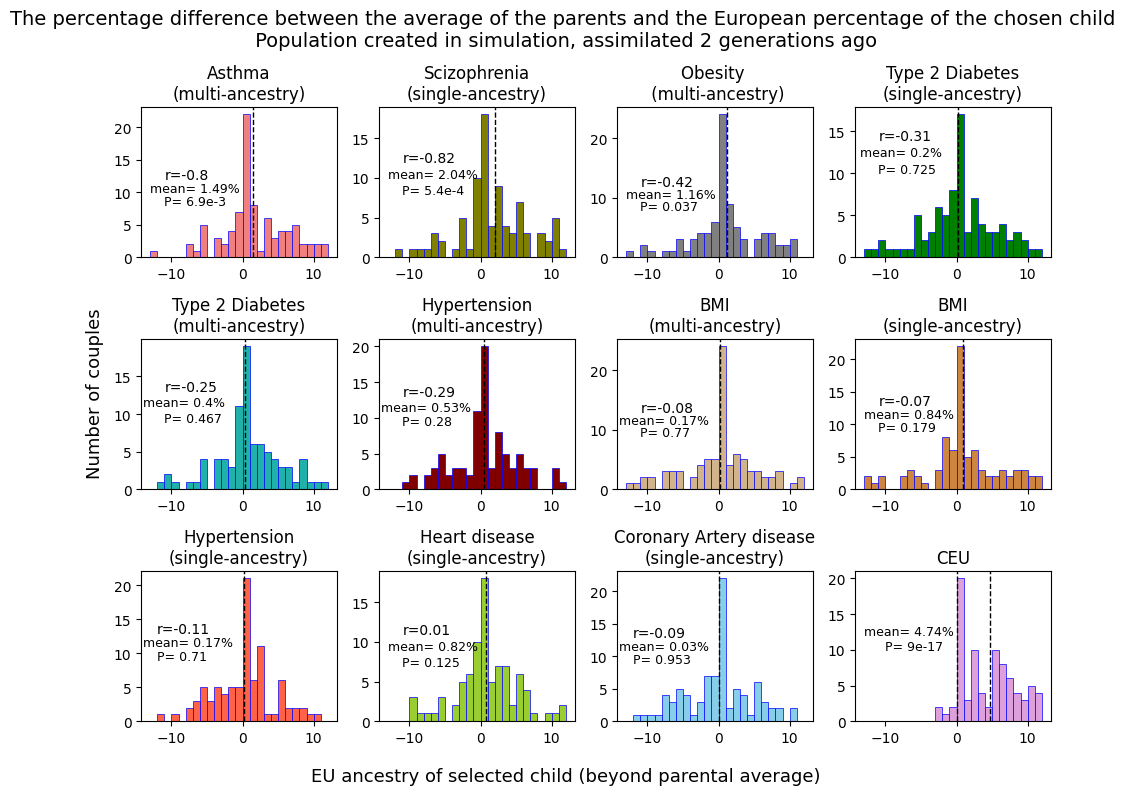

In [ ]:
fig, axes = plt.subplots(3, 4, sharey=False, figsize=(10,8), tight_layout=True)
#fig.suptitle("mix5050_CUE&YRI \n The European percentage of the child with the best score - the average of the European percentage of both parents",fontsize=16)
fig.suptitle('The percentage difference between the average of the parents and the European percentage of the chosen child \n Population created in simulation, assimilated 2 generations ago ',fontsize=14)
fig.supxlabel('EU ancestry of selected child (beyond parental average)',fontsize=13)
fig.supylabel('Number of couples',fontsize=13)
axes[0,0].set_title('Asthma\n(multi-ancestry)')
axes[0,0].hist(my_scores.query('chosen_Asthma_mixed==1')['CUE']-np.array(parent_CUE_means),color = "lightcoral", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Asthma_mixed')
axes[0,0].axvline(np.mean(my_scores.query('chosen_Asthma_mixed==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[0,0].text(-11,12,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Asthma-mixed_SUM'])[0],2)), fontsize = 10)
axes[0,0].text(-13,10,'mean= '+str(round(np.mean(my_scores.query('chosen_Asthma_mixed==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[0,0].text(-11,8,'P= '+'6.9e-3', fontsize = 9)
axes[0,0].axvline(0, linewidth=0.5)
axes[0,1].set_title('Scizophrenia\n(single-ancestry)')
axes[0,1].hist(my_scores.query('chosen_Scizophrenia==1')['CUE']-np.array(parent_CUE_means),color = "olive", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Scizophrenia')
axes[0,1].axvline(np.mean(my_scores.query('chosen_Scizophrenia==1')['CUE']-np.array(parent_CUE_means)), color='black',linestyle='dashed', linewidth=1)
axes[0,1].text(-11,12,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Schizophrenia_SUM'])[0],2)), fontsize = 10)
axes[0,1].text(-13,10,'mean= '+ str(round(np.mean(my_scores.query('chosen_Scizophrenia==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[0,1].text(-11,8,'P= '+'5.4e-4', fontsize = 9)
#axes[0,2].axvline(np.median(samples_2220.query('chosen_Scizophrenia==1')['CUE']-np.array(parent_CUE_means)), color='white',linestyle='dashed', linewidth=1)
axes[0,2].set_title('Obesity \n (multi-ancestry)')
axes[0,2].hist(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means),color = "gray", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Obesity')
axes[0,2].axvline(np.mean(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[0,2].text(-11,12,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Obesity_SUM'])[0],2)), fontsize = 10)
axes[0,2].text(-13,10,'mean= '+str(round(np.mean(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[0,2].text(-11,8,'P= '+str(round(ttest_1samp(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means),0)[1],3)), fontsize = 9)
#axes[0,1].axvline(np.median(samples_2220.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means)), color='white', linestyle='dashed', linewidth=1)
axes[0,3].set_title('Type 2 Diabetes\n(single-ancestry)')
axes[0,3].hist(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means),color = "green", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Diabetes')
axes[0,3].axvline(np.mean(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[0,3].text(-11,14,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Diabetes_SUM'])[0],2)), fontsize = 10)
axes[0,3].text(-13.5,12,'mean= '+str(round(np.mean(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[0,3].text(-11,10,'P= '+str( round(ttest_1samp(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[1,0].set_title('Type 2 Diabetes\n(multi-ancestry)')
axes[1,0].hist(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means),color = "lightseagreen", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='mix-Diabetes')
axes[1,0].axvline(np.mean(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[1,0].text(-11,13,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-Diabetes_SUM'])[0],2)), fontsize = 10)
axes[1,0].text(-14,11,'mean= '+str(round(np.mean(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[1,0].text(-11,9,'P= '+str( round(ttest_1samp(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[1,1].set_title('Hypertension\n(multi-ancestry)')
axes[1,1].hist(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means),color = "maroon", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Hypertension')
axes[1,1].axvline(np.mean(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[1,1].text(-11,13,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-Hypertension_SUM'])[0],2)), fontsize = 10)
axes[1,1].text(-14,11,'mean= '+str(round(np.mean(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[1,1].text(-11,9,'P= '+str( round(ttest_1samp(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[1,2].set_title('BMI\n(multi-ancestry)')
axes[1,2].hist(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means),color = "tan", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='mix-BMI')
axes[1,2].axvline(np.mean(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means)),color='black', linestyle='dashed', linewidth=1)
axes[1,2].text(-11,13,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-BMI_SUM'])[0],2)), fontsize = 10)
axes[1,2].text(-14,11,'mean= '+str(round(np.mean(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[1,2].text(-11,9,'P= '+str( round(ttest_1samp(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[1,3].set_title('BMI\n(single-ancestry)')
axes[1,3].hist(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means),color = "peru", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='BMI')
axes[1,3].axvline(np.mean(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means)),color='black', linestyle='dashed', linewidth=1)
axes[1,3].text(-11,13,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['BMI_SUM'])[0],2)), fontsize = 10)
axes[1,3].text(-13,11,'mean= '+str(round(np.mean(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[1,3].text(-11,9,'P= '+str(round(ttest_1samp(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[2,0].set_title('Hypertension\n(single-ancestry)')
axes[2,0].hist(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means),color = "tomato", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Hypertension')
axes[2,0].axvline(np.mean(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[2,0].text(-12,13,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Hypertension_SUM'])[0],2)), fontsize = 10)
axes[2,0].text(-14,11,'mean= '+str(round(np.mean(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[2,0].text(-12,9,'P= '+str(round(ttest_1samp(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
#axes[0,0].set_title('Asthma_European')
#axes[0,0].hist(samples_2220.query('chosen_Asthma_European==1')['CUE']-np.array(parent_CUE_means),color = "indigo", ec="blue",lw=0.5,bins=20,label='Asthma_European')
#axes[0,0].axvline(np.mean(samples_2220.query('chosen_Asthma_European==1')['CUE']-np.array(parent_CUE_means)),  color='black', linestyle='dashed', linewidth=1)
axes[2,1].set_title('Heart disease\n(single-ancestry)')
axes[2,1].hist(my_scores.query('chosen_Heartdisease==1')['CUE']-np.array(parent_CUE_means),color = "yellowgreen", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Heartdisease')
axes[2,1].axvline(np.mean(my_scores.query('chosen_Heartdisease==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[2,1].text(-11,11,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Heartdisease_SUM'])[0],2)), fontsize = 10)
axes[2,1].text(-13,9,'mean= '+str(round(np.mean(my_scores.query('chosen_Heartdisease==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[2,1].text(-11,7,'P= '+str(round(ttest_1samp(my_scores.query('chosen_Heartdisease==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[2,2].set_title('Coronary Artery disease\n(single-ancestry)')
axes[2,2].hist(my_scores.query('chosen_CAD==1')['CUE']-np.array(parent_CUE_means),color = "skyblue", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='CAD')
axes[2,2].axvline(np.mean(my_scores.query('chosen_CAD==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[2,2].text(-12,13,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['CAD_SUM'])[0],2)), fontsize = 10)
axes[2,2].text(-14,11,'mean= '+str(round(np.mean(my_scores.query('chosen_CAD==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[2,2].text(-12,9,'P= '+str(round(ttest_1samp(my_scores.query('chosen_CAD==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[2,3].set_title('CEU')
axes[2,3].hist(my_scores.query('chosen_CUE==1')['CUE']-np.array(parent_CUE_means),color = "plum", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='CUE')
axes[2,3].axvline(0, color='black',linestyle='dashed', linewidth=1)
axes[2,3].axvline(np.mean(my_scores.query('chosen_CUE==1')['CUE']-np.array(parent_CUE_means)), color='black',linestyle='dashed', linewidth=1)
#axes[2,3].text(-10,13,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['CUE'])[0],2)), fontsize = 8)
axes[2,3].text(-13,12,'mean= '+str(round(np.mean(my_scores.query('chosen_CUE==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[2,3].text(-10,10,'P= '+'9e-17',fontsize = 9)

<ipython-input-39-c508f0d557b8>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Familys['parent_CUE_mean']=np.array(my_scores.groupby(['Generation','Family']).mean().query('Generation==2')['CUE'])


mean:  -0.0018837812500000065
variance:  0.002736544954060103
standard deviation:  0.05231199627294014


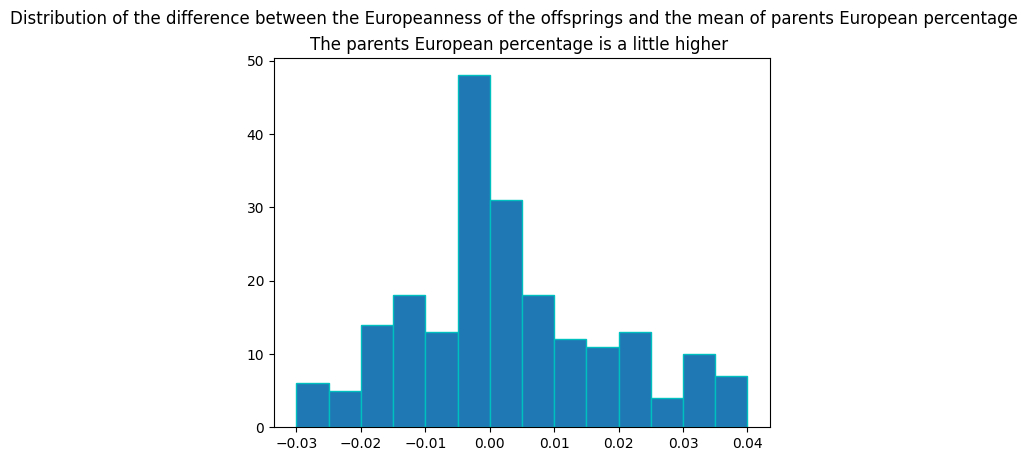

In [ ]:
Familys=pd.DataFrame()
my_scores.groupby(['Family']).max().query('Generation==2')['CUE']
for i in range(len(my_scores)//10):
  for j in range(6,10):
    Familys.loc[i,'offspring'+str(j-5)+'_CUE']= my_scores.loc[i*10+j,'CUE']
Familys['parent_CUE_mean']=np.array(my_scores.groupby(['Generation','Family']).mean().query('Generation==2')['CUE'])
for i in range(1,5):
  Familys['distance from parentAverage_offsring'+str(i)]=Familys['offspring'+str(i)+'_CUE']-Familys['parent_CUE_mean']

# Testing the distribution of the difference between the Europeanness of the offsprings and the mean of the parents
# all children together (4 per family)

plt.hist(Familys.loc[:,[col for col in Familys.columns if col.startswith('distance')]].stack(),ec="c",lw=1,bins=np.arange(-0.03,0.04,0.005))
plt.suptitle("Distribution of the difference between the Europeanness of the offsprings and the mean of parents European percentage")# ( mean CUE parents - CUE child)")
plt.title("The parents European percentage is a little higher ")
print('mean: ',np.mean(Familys.loc[:,[col for col in Familys.columns if col.startswith('distance')]].stack()))
print('variance: ', np.var(Familys.loc[:,[col for col in Familys.columns if col.startswith('distance')]].stack()))
print('standard deviation: ',np.std(Familys.loc[:,[col for col in Familys.columns if col.startswith('distance')]].stack()))

In [ ]:
Familys

,offspring1_CUE,offspring2_CUE,offspring3_CUE,offspring4_CUE,parent_CUE_mean,distance from parentAverage_offsring1,distance from parentAverage_offsring2,distance from parentAverage_offsring3,distance from parentAverage_offsring4
0,0.726994,0.758006,0.772715,0.786816,0.749628,-0.022634,0.008378,0.023087,0.037188
1,0.803244,0.833916,0.717377,0.856048,0.755729,0.047515,0.078187,-0.038352,0.100319
2,0.197258,0.104825,0.279537,0.205545,0.247891,-0.050633,-0.143066,0.031646,-0.042346
3,0.684596,0.768652,0.703813,0.749093,0.757096,-0.072500,0.011556,-0.053283,-0.008003
4,0.504432,0.501425,0.499419,0.502706,0.500000,0.004432,0.001425,-0.000581,0.002706
...,...,...,...,...,...,...,...,...,...
83,0.423541,0.386793,0.428029,0.512087,0.498910,-0.075369,-0.112117,-0.070881,0.013177
84,0.741006,0.916887,0.708392,0.714284,0.753920,-0.012914,0.162967,-0.045528,-0.039636
85,0.549387,0.458962,0.353098,0.509169,0.500159,0.049227,-0.041197,-0.147061,0.009010
86,0.000010,0.000010,0.000010,0.000010,0.000010,0.000000,0.000000,0.000000,0.000000
